In [1]:
import numpy as np
import imageio
import scipy.special
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

filepath = 'SampleData'
filename = 'Block1.tif'

In [2]:
def average_image(filepath, filename):
    '''
    Get the average image for a video file (tiff stack).
    '''
    # TODO: the user can define the number of sub-blocks, and get average image for each bloack.
    im = imageio.imread(filepath + '/' + filename)
    xdim, ydim = np.shape(im)    # get dimensions
    mean_im = np.zeros((im.shape))
    
    vid_reader = imageio.get_reader(filepath + '/' + filename)
    mvlength = vid_reader.get_length()
    for frame in vid_reader:
        mean_im = mean_im + frame    
    mean_im = mean_im / mvlength
    
    return mean_im

In [3]:
xx = average_image(filepath, filename)
xx

Image([[ 677.295,  688.97 ,  699.125, ...,  413.005,  412.495,  416.98 ],
       [ 686.195,  704.59 ,  727.305, ...,  391.375,  419.825,  426.42 ],
       [ 700.645,  722.73 ,  716.485, ...,  406.17 ,  421.555,  421.26 ],
       ...,
       [1274.97 , 1285.755, 1348.43 , ...,  530.495,  535.045,  534.625],
       [1292.12 , 1382.345, 1428.71 , ...,  538.63 ,  543.785,  538.535],
       [1375.51 , 1440.95 , 1462.345, ...,  526.055,  541.445,  520.215]])

In [4]:
def calc_moments(filepath, filename, highest_order):
    '''
    Get all moment-reconstructed images to the user-defined highest order for a video (tiff stack).
    '''
    # TODO: the user can define the number of sub-blocks, and get moment images for each bloack.
    mean_im = average_image(filepath, filename)
    xdim, ydim = np.shape(mean_im)
    m_set = {}
    calculated_moment_images = []
    vid_reader = imageio.get_reader(filepath + '/' + filename)
    mvlength = vid_reader.get_length()
    
    for order in range(highest_order):
        m_set[order+1] = np.zeros((xdim, ydim))
        for frame in vid_reader:
            m_set[order+1] = m_set[order+1] + np.power(frame - mean_im, order+1)
        
        m_set[order+1] = np.int64(m_set[order+1] / mvlength)
    return m_set

In [5]:
tt=calc_moments(filepath, filename, 5)

In [6]:
def calc_cumulants_from_moments(moment_set, highest_order):
    '''
    Calculate cumulant-reconstructed images from moment-reconstructed images.
    '''
    k_set = {}
    for order in range(1, highest_order + 1):
        k_set[order] = np.int64(moment_set[order] - np.sum(np.array([scipy.special.comb(order-1,i)*k_set[order-i]*moment_set[i] for i in range(1,order)]),axis=0))
    
    return k_set

In [7]:
kk=calc_cumulants_from_moments(tt, 5)
kk[5]

Image([[  10788225821,   -8938860437,  131930866964, ...,  -13630617832,
           2949436217,   -7499664124],
       [  92904568568,   16167664183,    5813516017, ...,   -5099694152,
          -5892362126,   -7019951842],
       [ -28103978400,  -77038248736,   71148538447, ...,   -3499087126,
            792336426,  -10655484752],
       ...,
       [ -45156879102,   56471679654, -199690549063, ...,    8526359545,
           2825243382,  -16567264873],
       [-211108093729,  -10489645781, -242689483642, ...,   -9464496348,
         -14852850519,  -30960002793],
       [-214754116075,  -68473503708, -329169138111, ...,  -26616579400,
         -22253888330,    5994772755]])

In [8]:
im = imageio.imread(filepath + '/' + filename)
xdim, ydim = im.shape    # get dimensions
mean_im = np.zeros((im.shape))

vid_reader = imageio.get_reader(filepath + '/' + filename)
mvlength = vid_reader.get_length()

# 1. Calculate the average image.
for frame in vid_reader:
    mean_im = mean_im + frame
    
mean_im = mean_im / mvlength

# 2. calculate moments for each order
highest_order = 7
m_set = {}
calculated_moment_images = []
for order in range(1, highest_order + 1):
    m_set[order] = np.zeros((im.shape))
    for frame in vid_reader:
        m_set[order] = m_set[order] + np.power(frame - mean_im, order)
        
    m_set[order] = np.int64(m_set[order] / mvlength)
m_set    

{1: Image([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 2: Image([[21213, 16718, 19022, ..., 13316, 10310,  9398],
        [19050, 19709, 18398, ...,  7570, 10577, 10664],
        [17708, 22708, 20651, ...,  9781, 11541, 11051],
        ...,
        [34483, 41634, 41795, ..., 13214, 12056, 12146],
        [47728, 48433, 45340, ..., 15030, 13819, 15979],
        [48235, 56810, 51111, ..., 13744, 14302, 10319]]),
 3: Image([[ 953057,  936245, 1128340, ..., 1274646,  808787,  441399],
        [1301344, 1884027,  101102, ...,  457510,  447120,  524821],
        [ 644556, 1224052,  770136, ...,  284251, 1054820,  519248],
        ...,
        [1767622, 1448126, 1468811, ...,  506213,  405047,  419591],
        [4357143, -423133, 3508082, ...,  463567,  661778, 1346977],
        [6420504, 2074726, 2988785, ...,  754172,  838597,  563

In [9]:
# 3. calculate cumulants from moments
import scipy.special
import numpy as np

highest_order = 7
k_set = {}
for order in range(1, highest_order + 1):
    k_set[order] = np.int64(m_set[order] - np.sum(np.array([scipy.special.comb(order-1,i)*k_set[order-i]*m_set[i] for i in range(1,order)]),axis=0))
    
k_set

{1: Image([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 2: Image([[21213, 16718, 19022, ..., 13316, 10310,  9398],
        [19050, 19709, 18398, ...,  7570, 10577, 10664],
        [17708, 22708, 20651, ...,  9781, 11541, 11051],
        ...,
        [34483, 41634, 41795, ..., 13214, 12056, 12146],
        [47728, 48433, 45340, ..., 15030, 13819, 15979],
        [48235, 56810, 51111, ..., 13744, 14302, 10319]]),
 3: Image([[ 953057,  936245, 1128340, ..., 1274646,  808787,  441399],
        [1301344, 1884027,  101102, ...,  457510,  447120,  524821],
        [ 644556, 1224052,  770136, ...,  284251, 1054820,  519248],
        ...,
        [1767622, 1448126, 1468811, ...,  506213,  405047,  419591],
        [4357143, -423133, 3508082, ...,  463567,  661778, 1346977],
        [6420504, 2074726, 2988785, ...,  754172,  838597,  563

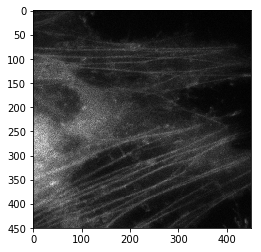

In [10]:
%matplotlib inline
x=np.array(m_set[2])
plt.imshow(x, cmap = 'gray',interpolation='nearest')

In [11]:
# 5. ldrc

# in the function
from scipy.interpolate import griddata
def ldrc(input_im, mask_im, order, window_size):
    xdim_mask, ydim_mask = np.shape(mask_im)
    xdim, ydim = np.shape(input_im)
    if xdim == xdim_mask and ydim == ydim_mask:
        mask = mask_im
    else:
        # resize mask to the image dimension if not the same dimension (xdim = xdim_mask, ydim = ydim_mask)
        mod_xdim = (xdim_mask-1)*order + 1    # new mask x dimemsion
        mod_ydim = (ydim_mask-1)*order + 1    # new mask y dimemsion
        px = np.arange(0,mod_xdim,order)
        py = np.arange(0,mod_ydim,order)
    
        # create coordinate list for interpolation
        coor_lst = [] 
        for i in px:
            for j in py:
                coor_lst.append([i,j])
        coor_lst = np.array(coor_lst)

        orderjx = complex(str(mod_xdim) + 'j')
        orderjy = complex(str(mod_ydim) + 'j')
        px_new, py_new = np.mgrid[0:mod_xdim-1:orderjx, 0:mod_ydim-1:orderjy]    # new coordinates for interpolated mask

        interp_mask = griddata(coor_lst, mask_im.reshape(-1,1), (px_new, py_new), method='cubic')    # interpolation
        mask = interp_mask.reshape(px_new.shape)
    
    # input_im, mask, window_size, xdim, ydim
    seq_map = np.zeros((xdim, ydim))
    ldrc_im = np.zeros((xdim, ydim))
    for i in range(xdim - window_size + 1):
        for j in range(ydim - window_size + 1):
            window = input_im[i:i+window_size, j:j+window_size]
            norm_window = (window - np.min(window)) / (np.max(window) - np.min(window))
            # norm_window = window / np.max(window)
            ldrc_im[i:i+window_size, j:j+window_size] = ldrc_im[i:i+window_size, j:j+window_size] + norm_window * np.max(mask[i:i+window_size, j:j+window_size])
            seq_map[i:i+window_size, j:j+window_size] = seq_map[i:i+window_size, j:j+window_size] + 1
        
    ldrc_im = ldrc_im / seq_map  
    return ldrc_im

In [12]:
# variable for the function
input_im = m_set[6]
mask_im = mean_im
order = 3    # moments/cumulants order of the image need ldrc processing
window_size = 25

proldrc_im = ldrc(input_im, mask_im, order, window_size)
proldrc_im

array([[ 37.56813909,   8.81631708,  50.608915  , ..., 142.05370972,
         74.27186172,  21.90552345],
       [ 70.6925468 ,  42.43343042,   0.43921053, ...,  16.3228598 ,
         38.40339738,  45.71075751],
       [  7.52059522,  26.75276504,  30.76963799, ...,  29.39606267,
        106.41861927,  39.20923958],
       ...,
       [ 13.22936166,  29.21226012,  27.18606781, ...,   6.11688993,
          3.48698899,   1.57214727],
       [ 62.42901748,  51.06650812,  39.04886344, ...,   5.78186697,
          4.60435191,  11.90695375],
       [ 81.57990536,  91.10296254,  55.29448655, ...,   4.10317213,
          6.16556139,   2.95860687]])

In [13]:
# 4. deconvolution shrinking kernel
def fft_pad(psf, out_shape, mode='constant'):
    psf_shape = np.shape(psf)
    shape_diff = (out_shape[0]-psf_shape[0], out_shape[1]-psf_shape[1])
    #out_psf = np.pad(psf, ((0,shape_diff[0]), (0,shape_diff[1])), mode)
    out_psf = np.pad(psf, ((shape_diff[0]//2+1,shape_diff[0]//2), (shape_diff[1]//2+1,shape_diff[1]//2)), mode)
    return out_psf
        
# steal from https://github.com/david-hoffman/pyDecon/tree/master/notebooks
from skimage.external import tifffile as tif
from scipy.io import loadmat, savemat
try:
    import pyfftw
    from pyfftw.interfaces.numpy_fft import (fftshift, ifftshift, fftn, ifftn,
                                             rfftn, irfftn)
    # Turn on the cache for optimum performance
    pyfftw.interfaces.cache.enable()
except ImportError:
    from numpy.fft import (fftshift, ifftshift, fftn, ifftn,
                           rfftn, irfftn)
#from dphutils import fft_pad
import scipy.signal.signaltools as sig
from scipy.signal import fftconvolve
from scipy.ndimage import convolve

def _prep_img_and_psf(image, psf):
    """Do basic data checking, convert data to float, normalize psf and make
    sure data are positive"""
    assert psf.ndim == image.ndim, ("image and psf do not have the same number"
                                    " of dimensions")
    image = image.astype(np.float)
    psf = psf.astype(np.float)
    # need to make sure both image and PSF are totally positive.
    image = _ensure_positive(image)
    psf = _ensure_positive(psf)
    # normalize the kernel
    psf /= psf.sum()
    return image, psf

def _ensure_positive(data):
    """Make sure data is positive and has no zeros

    For numerical stability

    If we realize that mutating data is not a problem
    and that changing in place could lead to signifcant
    speed ups we can lose the data.copy() line"""
    # make a copy of the data
    data = data.copy()
    data[data <= 0] = np.finfo(data.dtype).eps
    return data

def _zero2eps(data):
    """Make sure data is positive and has no zeros

    For numerical stability

    If we realize that mutating data is not a problem
    and that changing in place could lead to signifcant
    speed ups we can lose the data.copy() line"""
    # make a copy of the data
    return np.fmax(data, np.finfo(data.dtype).eps)

def _rl_core_matlab(image, otf, psf, u_t, **kwargs):
    """The core update step of the RL algorithm

    This is a fast but inaccurate version modeled on matlab's version
    One improvement is to pad everything out when the shape isn't
    good for fft."""
    reblur = irfftn(otf * rfftn(u_t, u_t.shape, **kwargs), u_t.shape, **kwargs)
    reblur = _ensure_positive(reblur)
    im_ratio = image / reblur
    estimate = irfftn(np.conj(otf) * rfftn(im_ratio, im_ratio.shape, **kwargs), im_ratio.shape, **kwargs)
    # need to figure out a way to pass the psf shape
    for i, (s, p) in enumerate(zip(image.shape, psf.shape)):
        if s % 2 and not p % 2:
            estimate = np.roll(estimate, 1, i)
    estimate = _ensure_positive(estimate)
    return u_t * estimate

def _rl_accelerate(g_tm1, g_tm2, u_t, u_tm1, u_tm2, prediction_order):
    """Biggs-Andrews Acceleration

    .. [2] Biggs, D. S. C.; Andrews, M. Acceleration of Iterative Image
    Restoration Algorithms. Applied Optics 1997, 36 (8), 1766."""
    # TODO: everything here can be wrapped in ne.evaluate
    if g_tm2 is not None:
        alpha = (g_tm1 * g_tm2).sum() / ((g_tm2**2).sum() + np.finfo(g_tm1.dtype).eps)
        alpha = max(min(alpha, 1), 0)
    else:
        alpha = 0
    # print("lambda = {:.6f}".format(alpha))
    # if alpha is positive calculate predicted step
    if alpha:
        # first order correction
        h1_t = u_t - u_tm1
        if prediction_order > 1:
            # second order correction
            h2_t = (u_t - 2 * u_tm1 + u_tm2)
        else:
            h2_t = 0
        u_tp1 = u_t + alpha * h1_t + alpha**2 / 2 * h2_t
        return u_tp1
    else:
        return u_t
    
def richardson_lucy(image, psf, iterations=10, prediction_order=1,
                    core_type="matlab", init="matlab", **kwargs):
    image, psf = _prep_img_and_psf(image, psf)
    # choose core
    if core_type == "matlab":
        core = _rl_core_matlab
    else:
        raise ValueError("{} is not an acceptable core type".format(core_type))
    # set up the proper dict for the right core
    if core is _rl_core_matlab:
        image, psf = _prep_img_and_psf(image, psf)
        if psf.shape != image.shape:
            # its been assumed that the background of the psf has already been
            # removed and that the psf has already been centered
            psf = fft_pad(psf, image.shape, mode='constant')
        otf = rfftn(ifftshift(psf))
        core_dict = dict(image=image, otf=otf, psf=psf)
    else:
        raise RuntimeError("{} is not a valid core".format(core))
    # initialize variable for iterations
    # previous estimate
    u_tm1 = u_tm2 = None
    if init == "matlab":
        core_dict["u_t"] = u_t = image
    else:
        # current estimate, for the initial estimate we use the mean of the
        # data this promotes a smooth solution and helps to reduce noise.
        core_dict["u_t"] = u_t = np.ones_like(image) * image.mean()
    # previous difference
    g_tm1 = g_tm2 = None
    for i in range(iterations):
        # if prediction is requested perform it
        if prediction_order:
            # need to save prediction as intermediate value
            y = _rl_accelerate(g_tm1, g_tm2, u_t, u_tm1, u_tm2,
                               prediction_order)
        else:
            y = u_t
        # update estimate and ensure positive
        core_dict["u_t"] = _ensure_positive(y)
        # call the update function
        u_tp1 = core(**core_dict, **kwargs)
        # update
        # update g's
        g_tm2 = g_tm1
        # this is where the magic is, we need to compute from previous step
        # which may have been augmented by acceleration
        g_tm1 = u_tp1 - y
        # now move u's along
        # Here we don't want to update with accelerated version.
        # why not? is this a mistake?
        u_t, u_tm1, u_tm2 = u_tp1, u_t, u_tm1
        
    # return final estimate
    return u_t

In [23]:
# masks.py
def gauss2D_mask(shape = (3,3), sigma = 0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    mdim, ndim = [(pixel-1) / 2 for pixel in shape]
    y, x = np.ogrid[-mdim:(mdim + 1), -ndim:(ndim + 1)]
    h = np.exp( -(x*x + y*y) / (2*sigma*sigma) )
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h
  

In [15]:
# 3. DeconvSK
im = m_set[6]
xdim, ydim = im.shape    
ext_im = np.append(np.append(im, np.fliplr(im), axis=1), 
                   np.append(np.flipud(im), np.rot90(im, 2), axis=1), axis=0)

# TODO: add notes on how to determine the following values.
deconv_psf0 = gauss2D_mask((51, 51), 2)
deconv_psf0 = deconv_psf0 / np.max(deconv_psf0)
deconv_lambda = 1.5
deconv_iter = 20

deconv_im = ext_im
for iter_num in range(deconv_iter):
    alpha = deconv_lambda**(iter_num+1) / (deconv_lambda - 1)
    deconv_im = richardson_lucy(deconv_im, deconv_psf0**alpha, 1)    
    
deconv_im = deconv_im[0:xdim, 0:ydim]

In [16]:
def deconvsk(est_psf, input_im, deconv_lambda, deconv_iter):
    xdim, ydim = np.shape(input_im)
    deconv_im = np.append(np.append(input_im, np.fliplr(input_im), axis=1), np.append(np.flipud(input_im), np.rot90(input_im, 2), axis=1), axis=0)
    # perform mirror extension to the image in order to surpress ringing artifacts associated with fourier transform due to truncation effect.
    psf0 = est_psf / np.max(est_psf)
    for iter_num in range(deconv_iter):
        alpha = deconv_lambda**(iter_num+1) / (deconv_lambda - 1)
        deconv_im = richardson_lucy(deconv_im, psf0**alpha, 1)    
    
    deconv_im = deconv_im[0:xdim, 0:ydim]
    return deconv_im

In [19]:
m_set[6]

Image([[ 146599590365744,   90571191029081,  272101760182672, ...,
          59350132439161,   32492013076433,   11742189854429],
       [ 223073243872876,  207648824920054,   61715281680522, ...,
           9530095449668,   18279365814600,   21174860057859],
       [  77229430498215,  153038091926215,  189051584844149, ...,
          14653929813782,   45109892676569,   18534218455853],
       ...,
       [ 573095670561448,  991148087132016,  938150529138420, ...,
          47006231879300,   30062304763719,   17725361481711],
       [1859973333118466, 1562772890617558, 1248436575875913, ...,
          44847745761565,   37261251153506,   84310458061269],
       [2360888419163300, 2609975722106216, 1673360879587659, ...,
          34032249773485,   47319812368833,   26658044108375]])

In [20]:
dd=deconvsk(gauss2D_mask((51, 51), 2), m_set[6], deconv_lambda, deconv_iter)
dd

array([[1.09817928e+14, 2.97106258e+13, 4.13892643e+14, ...,
        1.20931804e+14, 2.92909317e+13, 1.08265661e+12],
       [2.83864675e+14, 2.10582261e+14, 9.73891459e+12, ...,
        4.81507539e+11, 7.95319395e+12, 1.17316254e+13],
       [1.57801523e+13, 1.31738008e+14, 1.57433651e+14, ...,
        4.14012692e+12, 9.04053977e+13, 1.23258084e+13],
       ...,
       [1.92623948e+13, 2.57972860e+14, 4.34014693e+14, ...,
        2.70789818e+13, 8.35840042e+12, 1.01496763e+12],
       [1.09100008e+15, 9.36775964e+14, 7.62003153e+14, ...,
        2.78460769e+13, 2.33493142e+13, 1.27530967e+14],
       [3.90459127e+15, 4.66181098e+15, 1.75614105e+15, ...,
        1.68250385e+13, 4.19288371e+13, 9.89123036e+12]])

In [27]:
gauss2D_mask((1, 21), 2)

array([[7.43359842e-07, 7.99187146e-06, 6.69151205e-05, 4.36341397e-04,
        2.21592446e-03, 8.76415125e-03, 2.69954863e-02, 6.47588052e-02,
        1.20985376e-01, 1.76032683e-01, 1.99471163e-01, 1.76032683e-01,
        1.20985376e-01, 6.47588052e-02, 2.69954863e-02, 8.76415125e-03,
        2.21592446e-03, 4.36341397e-04, 6.69151205e-05, 7.99187146e-06,
        7.43359842e-07]])

In [ ]:
def calculate_moment(im, moment_order, mean):
    moment = np.power(im - mean, moment_order)
    return moment

#def cumulant_from_moment(moment_lst, cumulant_lst, order):
    

In [ ]:
vid_reader = imageio.get_reader(filepath + '/' + filename)
mvlength = vid_reader.get_length()
t = vv.imshow(reader.get_next_data(), clim=(0, 255))

In [ ]:
def get_dimensions(filepath, filename):
    
    return xdim, ydim, mvlength
